<a href="https://colab.research.google.com/github/HamidMandi/MNE/blob/main/MNE_Toturial_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview of artifact & Noise detection

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
! pip install mne


     |████████████████████████████████| 6.9 MB 5.0 MB/s 


In [ ]:
import os
import numpy as np
import mne
import matplotlib.pyplot as plt


In [ ]:
folder_raw = mne.datasets.sample.data_path()
file_raw = os.path.join(folder_raw, "MEG", "sample",
                         "sample_audvis_raw.fif")


In [ ]:
raw = mne.io.read_raw_fif(file_raw, preload=True)
raw.crop(0, 60).load_data()

Opening raw data file /root/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 166799  =      0.000 ...   277.714 secs...


<Raw | sample_audvis_raw.fif, 376 x 36038 (60.0 s), ~106.7 MB, data loaded>

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


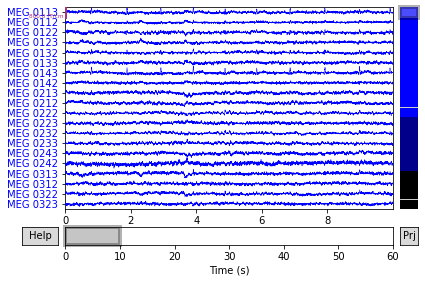

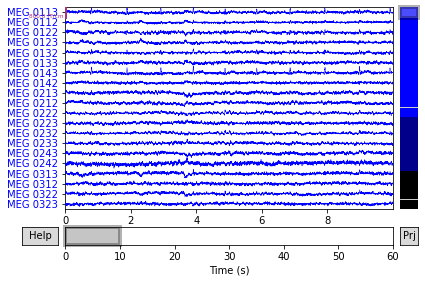

In [ ]:
raw.plot()

## What are artifacts? [Link](https://berdakh.github.io/blog/eeg/mne/jupyter/2020/09/22/MNE-Overview-Of-Artifact.html#What-are-artifacts?)

Any recorded signal that arise from sources other than the source of intrest. Familiarizing yourself with typical artifact patterns and magnitudes is a crucial first step in assessing the efficacy of later attempts to repair those artifacts. A good rule of thumb is that the artifact amplitudes should be orders of magnitude larger than your signal of interest — and there should be several occurrences of such events — in order to find signal decompositions that effectively estimate and repair the artifacts.

* **Environmental artifacts**

Persistent oscillations centered around the AC power line frequency_ (typically 50 or 60 Hz)

Brief signal jumps due to building vibration (such as a door slamming)

Electromagnetic field noise from nearby elevators, cell phones, the geomagnetic field, etc.


* **Instrumentation artifacts**

Electromagnetic interference from stimulus presentation (such as EEG sensors picking up the field generated by unshielded headphones)

Continuous oscillations at specific frequencies used by head position indicator (HPI) coils

Random high-amplitude fluctuations (or alternatively, constant zero signal) in a single channel due to sensor malfunction (e.g., in surface electrodes, poor scalp contact)

* **Biological artifacts**

Periodic QRS_-like signal patterns (especially in magnetometer channels) due to electrical activity of the heart

Short step-like deflections (especially in frontal EEG channels) due to eye movements

Large transient deflections (especially in frontal EEG channels) due to blinking
Brief bursts of high frequency fluctuations across several channels due to the muscular activity during swallowing



##What to do about artifacts [Link](https://berdakh.github.io/blog/eeg/mne/jupyter/2020/09/22/MNE-Overview-Of-Artifact.html#What-to-do-about-artifacts)
There are 3 basic options when faced with artifacts in your recordings:

* *Ignore* the artifact and carry on with analysis
* *Exclude* the corrupted portion of the data and analyze the remaining data
* *Repair* the artifact by suppressing artifactual part of the recording while (hopefully) leaving the signal of interest intact

## Low-frequency drifts

This artifact can detect esaily by visual inspection. We can use a bandpass filter with small cut-off (0.1) to eliminate it

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


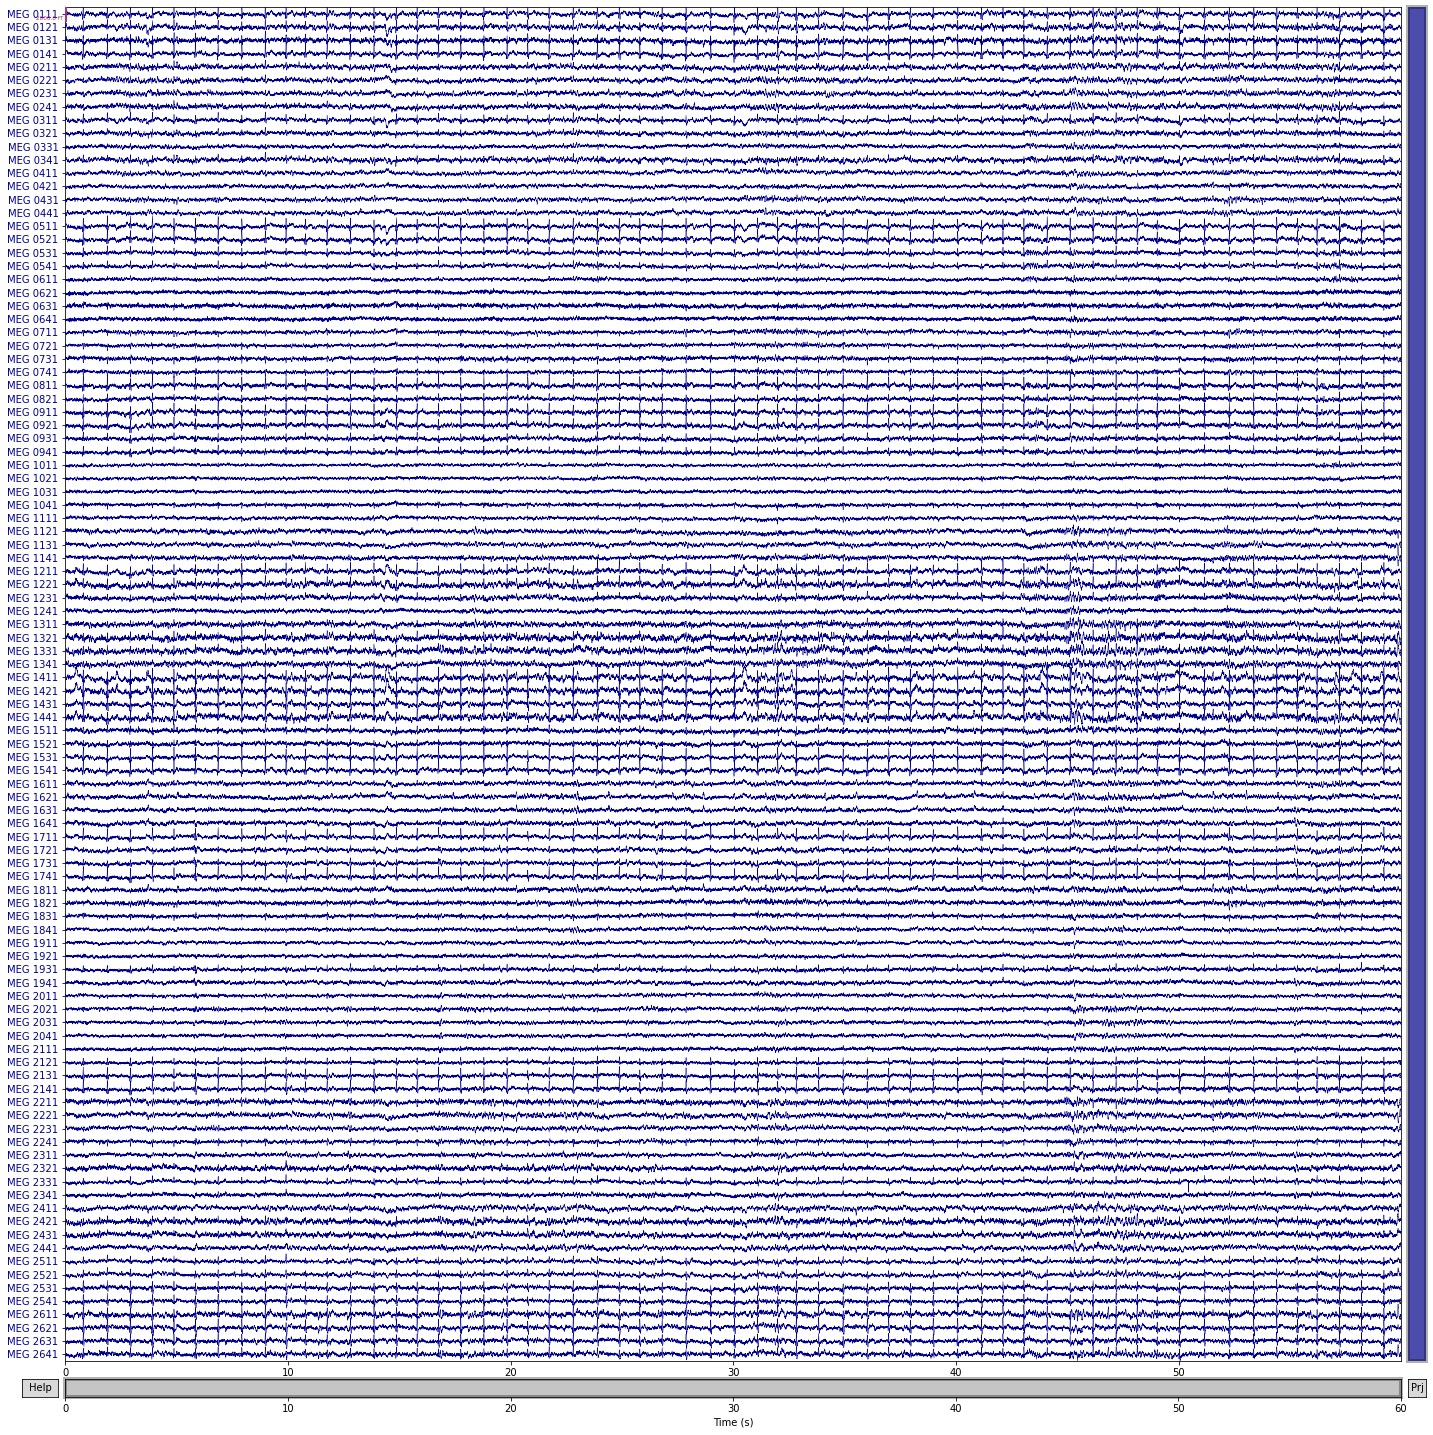

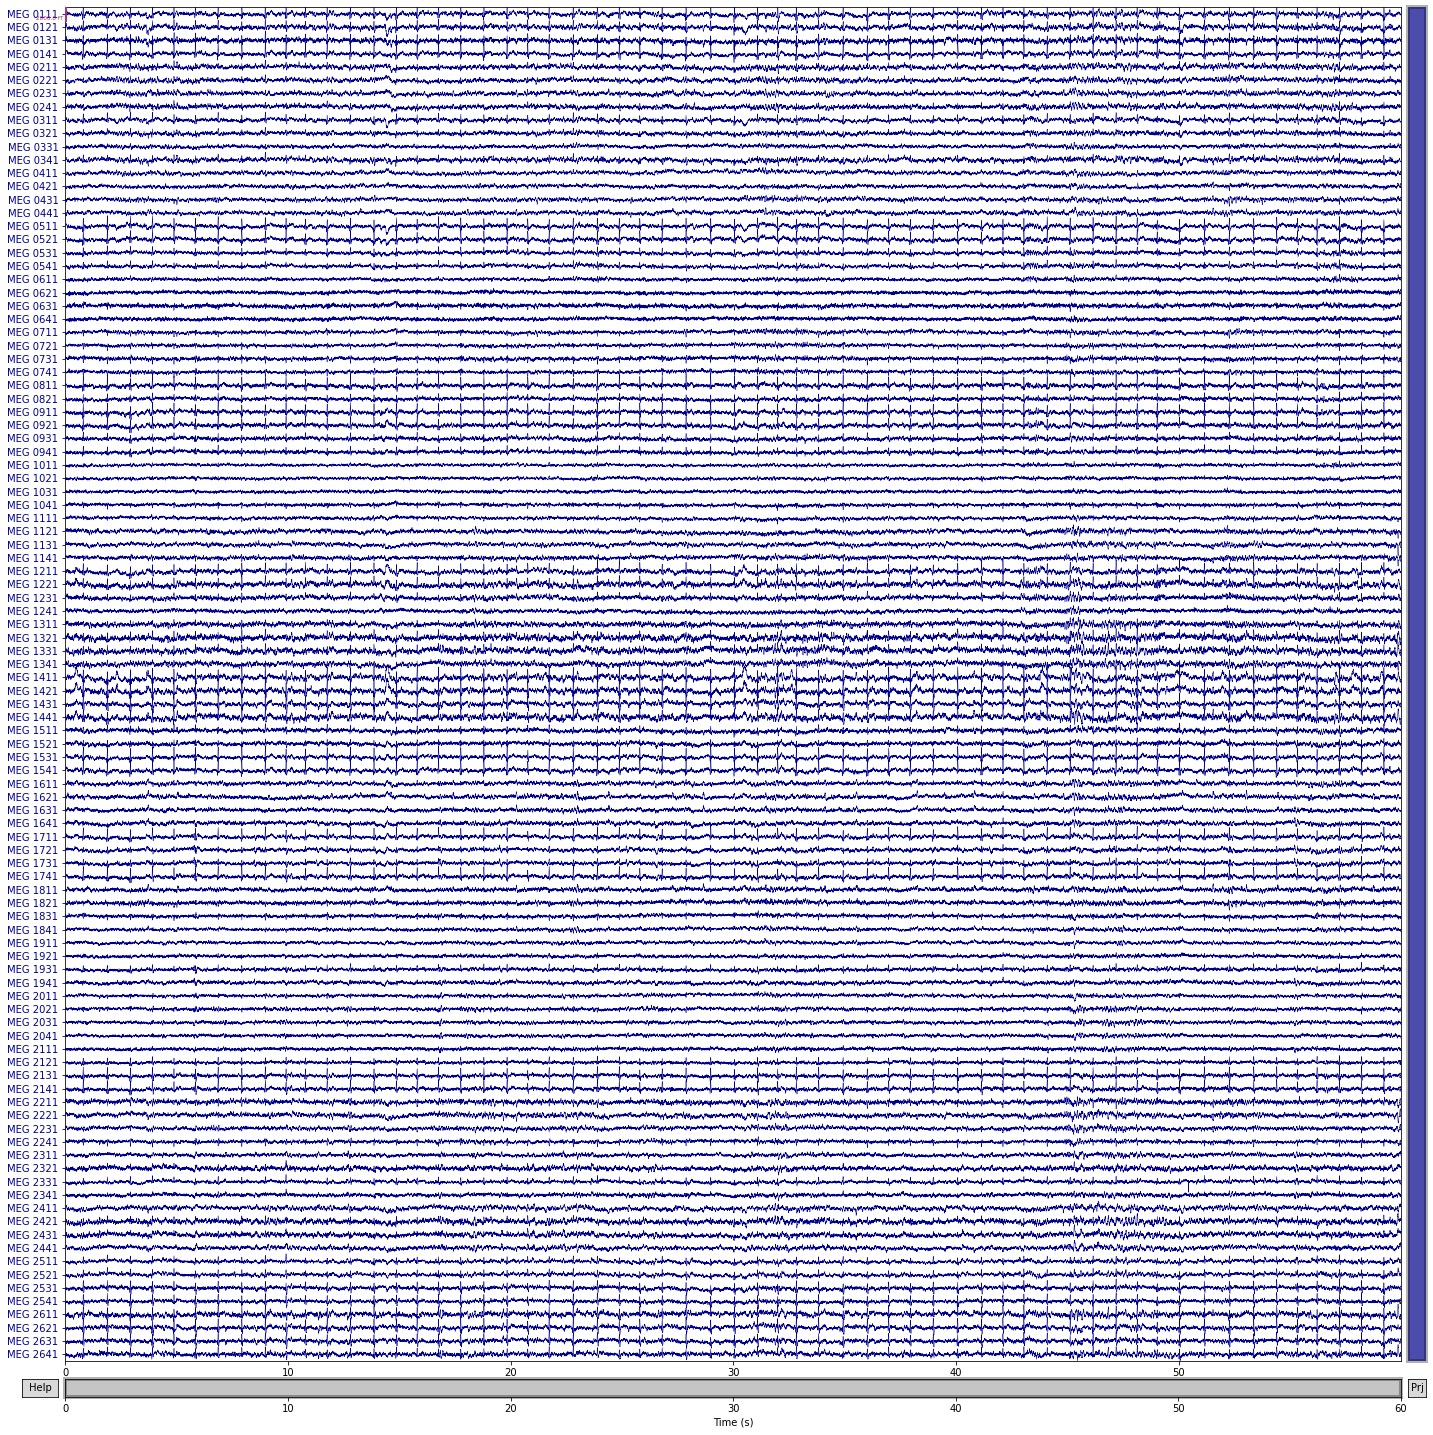

In [15]:
plt.rcParams["figure.figsize"] = [20, 20]
mag_channels = mne.pick_types(raw.info, meg="mag")
raw.plot(duration=60, order=mag_channels, remove_dc=False,
         n_channels=len(mag_channels))

##power line noise

These type of artifacts can be seen on the power spectrum. These narrow frequency peaks are usually located at 60, 120, 180, 240 Hz.

Effective window size : 3.410 (s)
Effective window size : 3.410 (s)
Effective window size : 3.410 (s)


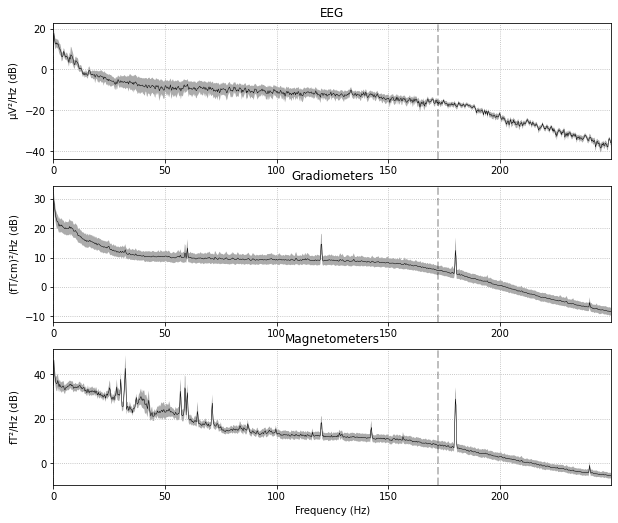

In [16]:
fig = raw.plot_psd(tmax=np.inf, fmax=250, average=True)
# add some arrows at 60 Hz and its harmonics:

for ax in fig.axes[:2]:
    freqs = ax.lines[-1].get_xdata()
    psds = ax.lines[-1].get_ydata()
    for freq in (60, 120, 180, 240):
        idx = np.searchsorted(freqs, freq)
        ax.arrow(x=freqs[idx], y=psds[idx] + 18, dx=0, dy=-12, color='red',
                 width=0.1, head_width=3, length_includes_head=True)

## Heartbeat artifacts (ECG)

We can also observe other peaks around 25, 30 Hz and they are probably related to heartbeat which is easily seen if we plot time domain visualization.

mne provides a dedicated methods for detecting ECG related activity

Reconstructing ECG signal from Magnetometers
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 6007 samples (10.001 sec)

Number of ECG events detected : 59 (average pulse 58 / min.)
Not setting metadata
Not setting metadata
59 matching events found
No baseline correction applied
Created an SSP operator (subspace dimension = 3)
Loading data for 59 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not settin

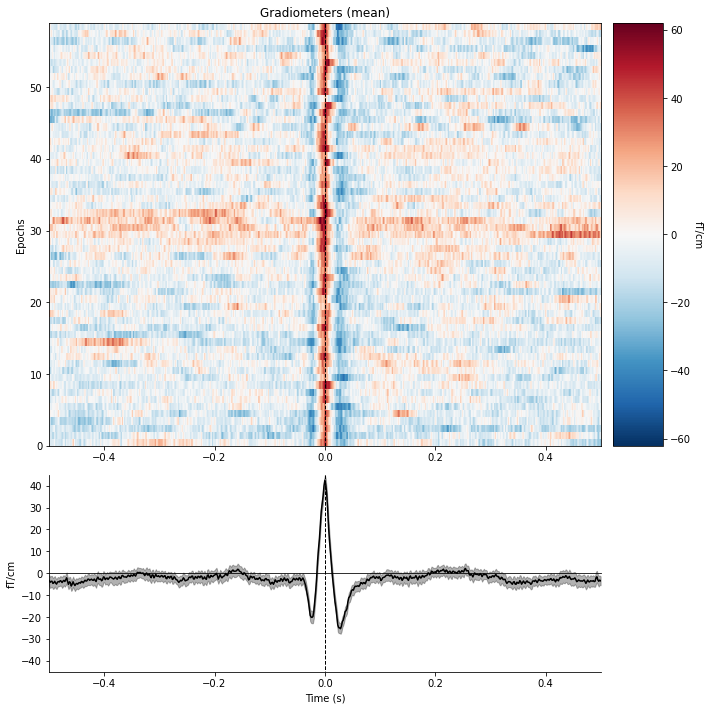

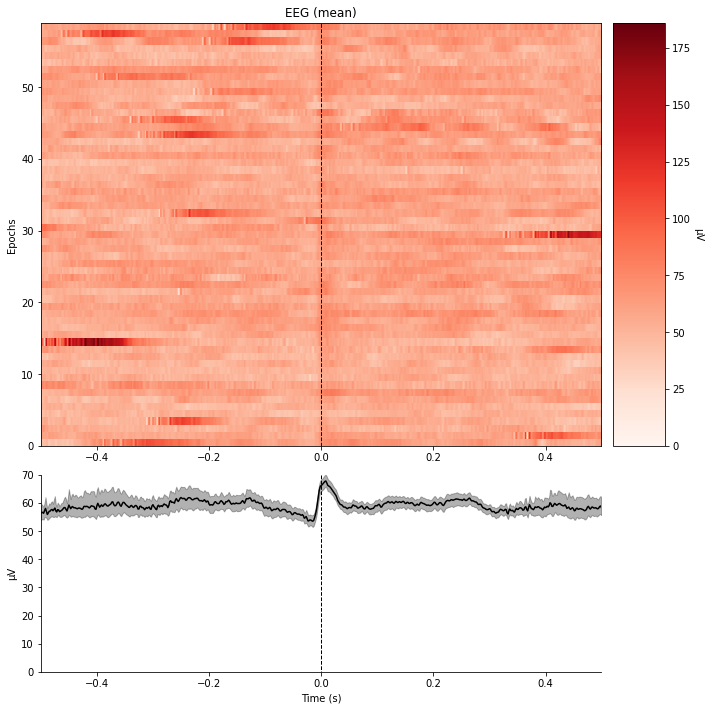

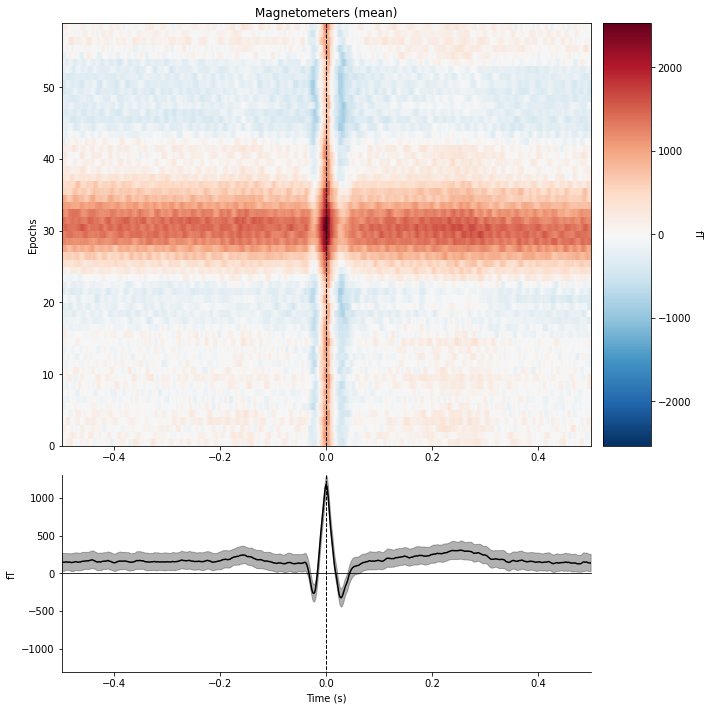

[<Figure size 720x720 with 3 Axes>,
 <Figure size 720x720 with 3 Axes>,
 <Figure size 720x720 with 3 Axes>]

In [27]:
plt.rcParams["figure.figsize"] = [10, 10]
ecg_epochs = mne.preprocessing.create_ecg_epochs(raw)
ecg_epochs.plot_image(combine="mean")

The **horizontal** streaks in the **magnetometer** image plot reflect the fact that the heartbeat artifacts are superimposed on **low-frequency** drifts like the one we saw in an earlier section; to avoid this you could pass baseline=(-0.5, -0.2) in the call to `mne.preprocessing.create_ecg_epochs. `

Reconstructing ECG signal from Magnetometers
Setting up band-pass filter from 8 - 16 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 8.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 7.75 Hz)
- Upper passband edge: 16.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 16.25 Hz)
- Filter length: 6007 samples (10.001 sec)

Number of ECG events detected : 59 (average pulse 58 / min.)
Not setting metadata
Not setting metadata
59 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 3)
Loading data for 59 events and 601 original time points ...
0 bad epochs dropped
Not setting metadata
Not setting metadata
59 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata

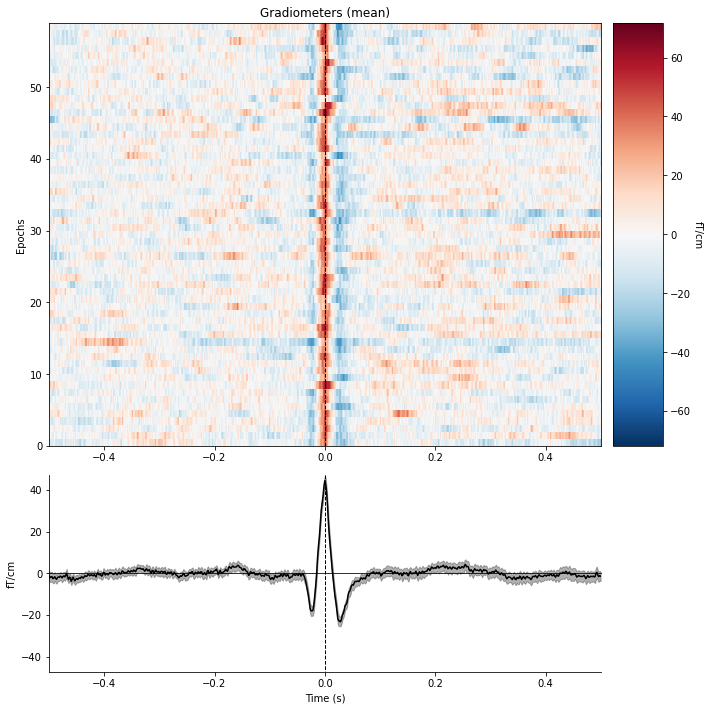

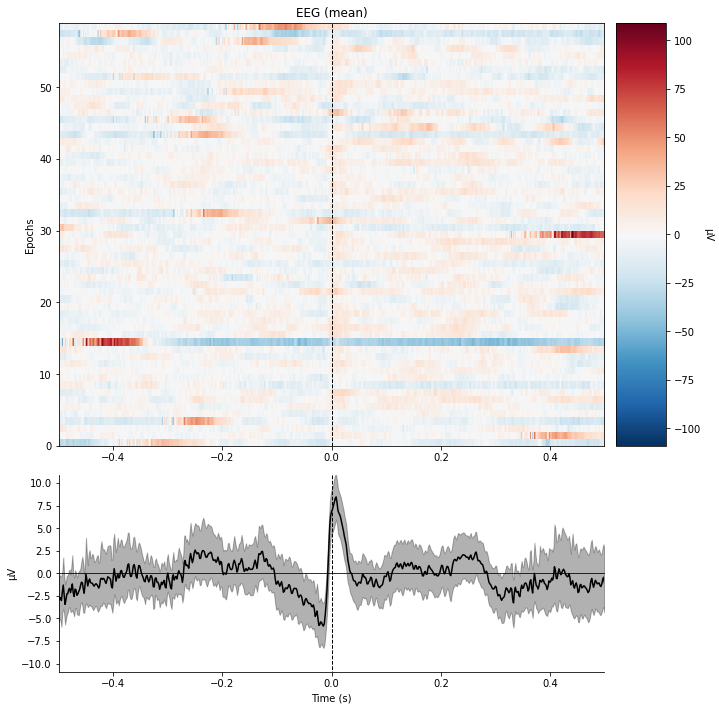

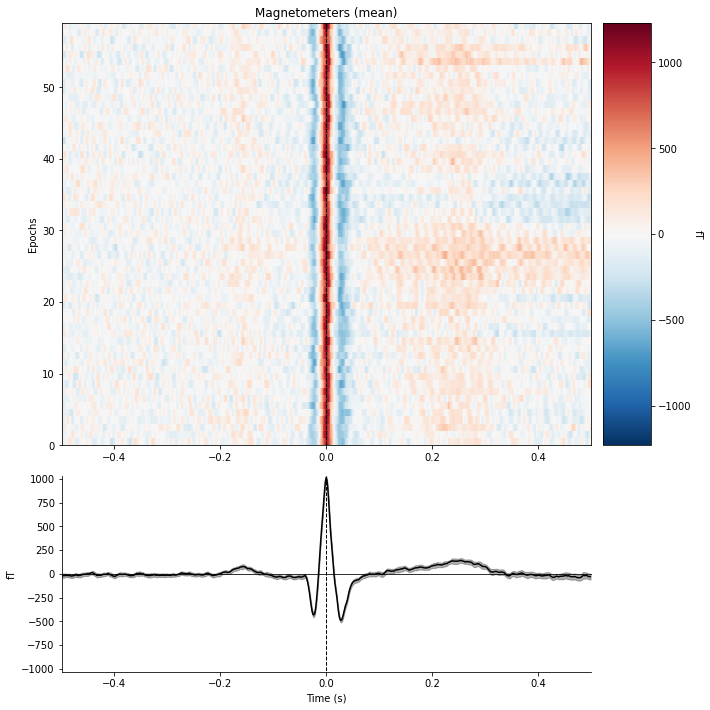

[<Figure size 720x720 with 3 Axes>,
 <Figure size 720x720 with 3 Axes>,
 <Figure size 720x720 with 3 Axes>]

In [26]:
ecg_epochs = mne.preprocessing.create_ecg_epochs(raw.copy(), baseline=(-0.5, -0.1))
ecg_epochs.plot_image(combine="mean")

In [23]:
ecg_epochs = mne.preprocessing.create_ecg_epochs?

ou can also get a quick look at the ECG-related field pattern across sensors by averaging the ECG epochs together via the `~mne.Epochs.average ` method, and then using the `mne.Evoked.plot_topomap` method:

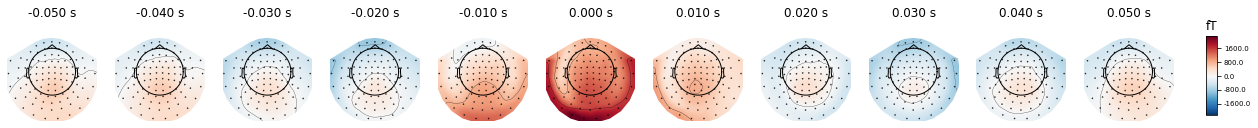

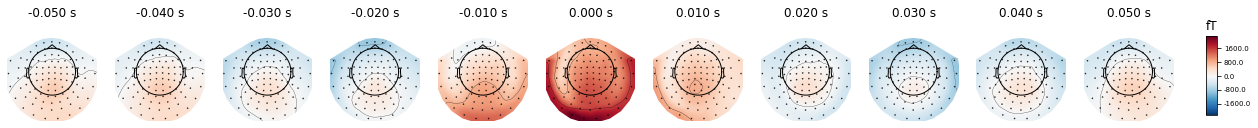

In [28]:
avg_ecg_epochs = ecg_epochs.average()
avg_ecg_epochs.plot_topomap(times=np.linspace(-0.05, 0.05, 11))

Created an SSP operator (subspace dimension = 3)
3 projection items activated
SSP projectors applied...
Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>


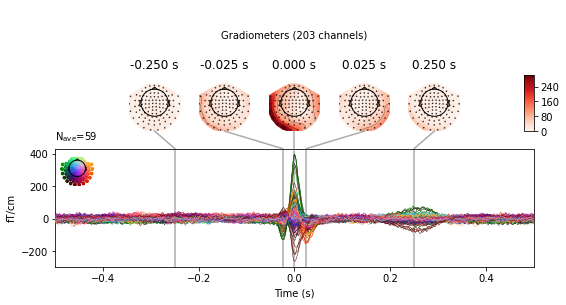

Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>


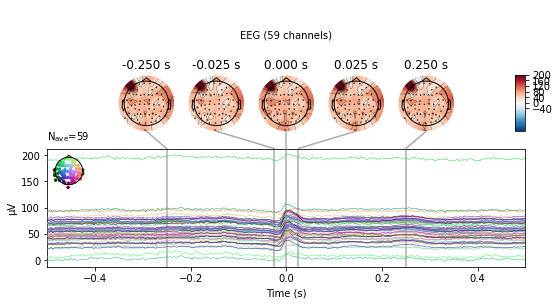

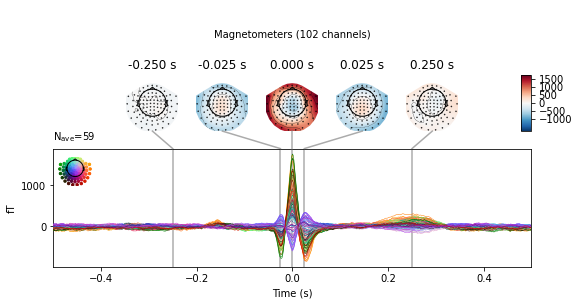

[<Figure size 576x302.4 with 9 Axes>,
 <Figure size 576x302.4 with 9 Axes>,
 <Figure size 576x302.4 with 9 Axes>]

In [30]:
avg_ecg_epochs.plot_joint(times=[-0.25, -0.025, 0, 0.025, 0.25])

These plots show frontal EEG sensors usually pick up the ECG artificat

## Ocualar artifacts (EOG)

In the similar vien, we can detect the EOG artifacte with mne tools

Using EOG channel: EOG 061
EOG channel index for this subject is: [375]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 6007 samples (10.001 sec)

Now detecting blinks and generating corresponding events
Found 10 significant peaks
Number of EOG events detected: 10
Not setting metadata
Not setting metadata
10 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 3)
Loading data for 10 events and 601 original time points ...
0 bad epochs dropped
Not 

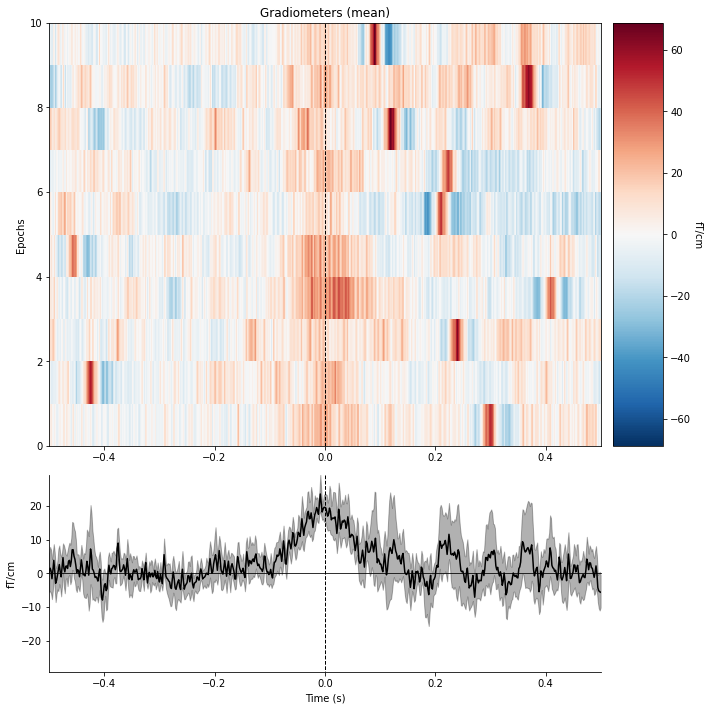

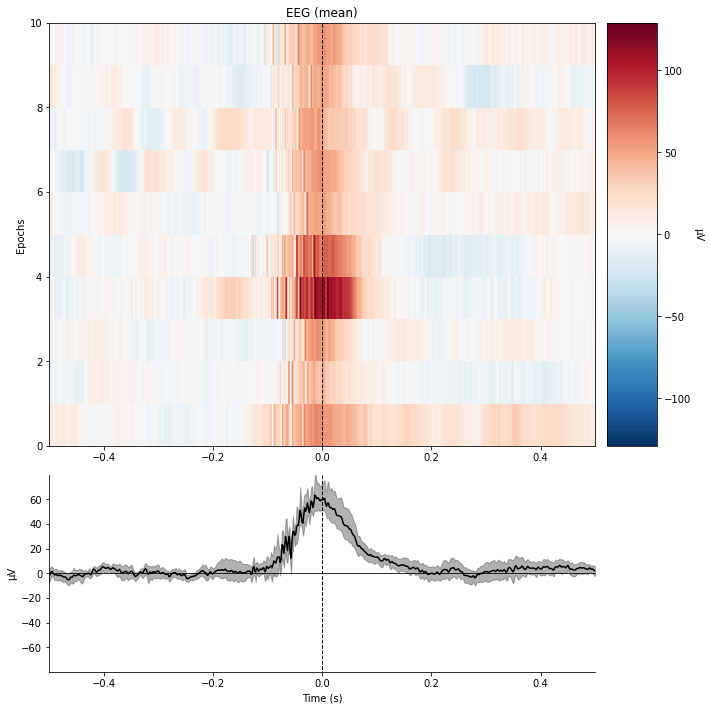

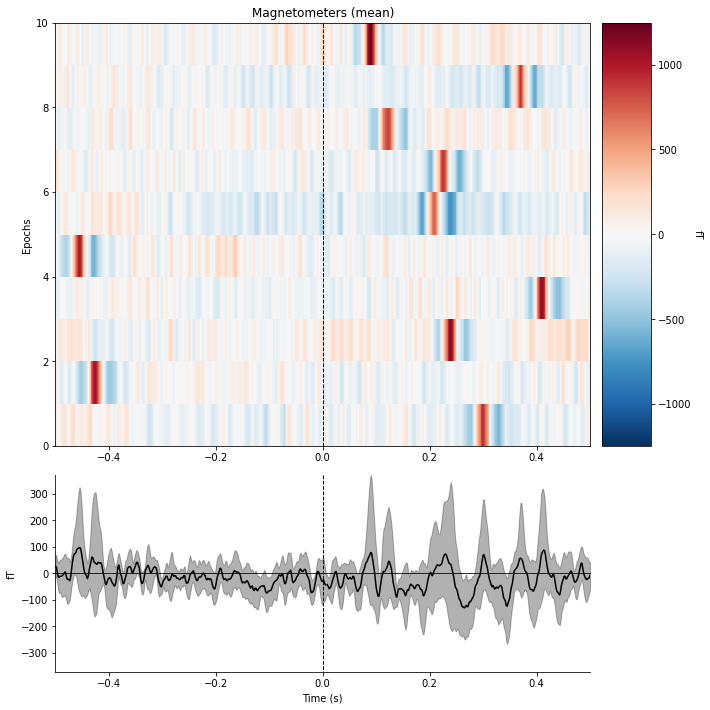

Created an SSP operator (subspace dimension = 3)
3 projection items activated
SSP projectors applied...
Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>


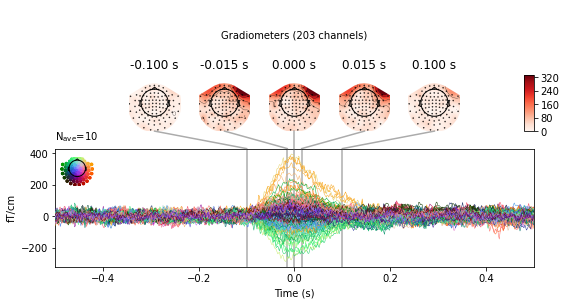

Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>


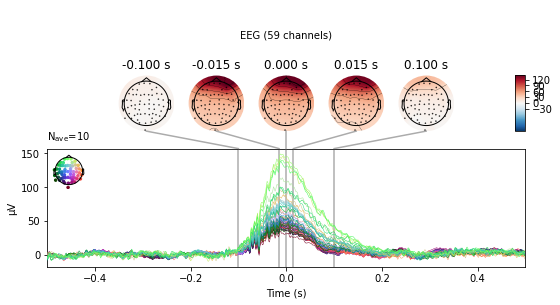

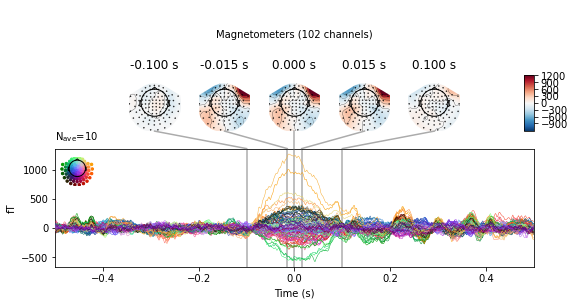

[<Figure size 576x302.4 with 9 Axes>,
 <Figure size 576x302.4 with 9 Axes>,
 <Figure size 576x302.4 with 9 Axes>]

In [36]:
eog_epochs = mne.preprocessing.create_eog_epochs(raw, baseline=(-0.5, -0.2))
eog_epochs.plot_image(combine="mean")
eog_epochs.average().plot_joint(times=[-0.1, -0.015, 0, 0.015, 0.1])

# Filtering and resampling data

mne Python tools for artifact detection:

* ICA [Link](https://mne.tools/stable/generated/mne.preprocessing.ICA.html?highlight=ica#mne.preprocessing.ICA)
* Maxwell filtering [Link](https://mne.tools/stable/generated/mne.preprocessing.compute_maxwell_basis.html?highlight=maxwell#mne.preprocessing.compute_maxwell_basis)
* Signal-Space Separation [Link](https://mne.tools/stable/auto_tutorials/preprocessing/60_maxwell_filtering_sss.html?highlight=sss)

* Signal-Space Projection [Link](https://mne.tools/stable/auto_tutorials/preprocessing/50_artifact_correction_ssp.html?highlight=signal%20space%20projection)



In [60]:
import mne
from mne.datasets import sample

data_path = sample.data_path()
raw_fname = data_path + "/MEG/sample/sample_audvis_raw.fif"


Setup for reading the raw data (save memory by cropping the raw data before loading it)

In [61]:
tmin, tmax = 0, 20    #use the first 20s of data

raw = mne.io.read_raw_fif(raw_fname, preload=True).crop(tmin, tmax)
raw.info["bad"] = ["MEG 2443", "MEG 053"] #bads + 2 more

Opening raw data file /root/mne_data/MNE-sample-data/MEG/sample/sample_audvis_raw.fif...
    Read a total of 3 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
    Range : 25800 ... 192599 =     42.956 ...   320.670 secs
Ready.
Reading 0 ... 166799  =      0.000 ...   277.714 secs...


Pick a subset of channels

In [62]:
selection = mne.read_selection("Left-temporal") 

picks = mne.pick_types(raw.info, meg="mag", eeg=False, eog=False,
                       exclude="bads", stim=False, selection=selection)

/usr/local/lib/python3.7/dist-packages/mne/utils/docs.py:2748: DeprecationWarning: Function read_vectorview_selection is deprecated; read_selection has been deprecated in favor of read_vectorview_selection and will be removed in 0.24.
  warnings.warn(msg, category=DeprecationWarning)


Effective window size : 3.410 (s)


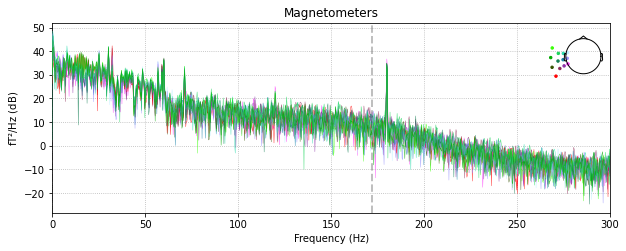

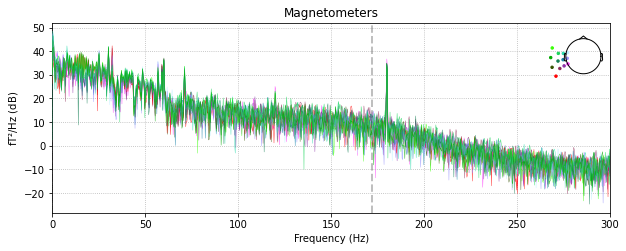

In [63]:
raw.plot_psd(area_mode="range", tmax=10.0, picks=picks, average=False)

In [64]:
raw.plot_psd?

#Removing power-line noise with notch filtering
First two steps are removing power line noise and slow drifts in data. After that we move on other techniques for removing ECG, EOG, ...



## 1. Removing power-line noise 
1.1 Removing power-line noise can be done with a `notch_filter`, directly on the Raw object, specifying an array of frequency to be cut off:

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3965 samples (6.602 sec)

Effective window size : 3.410 (s)


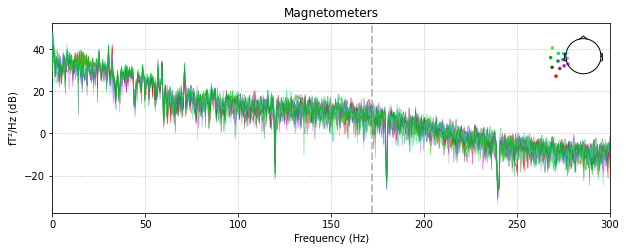

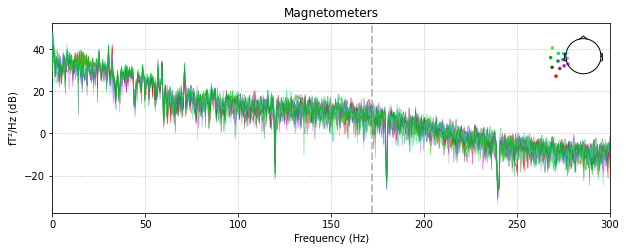

In [65]:
import numpy as np

raw.notch_filter(np.arange(60, 241, 60), picks=picks, filter_length="auto", phase="zero")
raw.plot_psd(tmax=10.0, picks=picks, area_mode="range", average=False)

1.2. If you're only interested in low frequencies, below the peaks of power-line noise (<50 Hz) you can simply low pass filter the data.

Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 49 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 49.00 Hz
- Upper transition bandwidth: 12.25 Hz (-6 dB cutoff frequency: 55.12 Hz)
- Filter length: 163 samples (0.271 sec)

Effective window size : 3.410 (s)


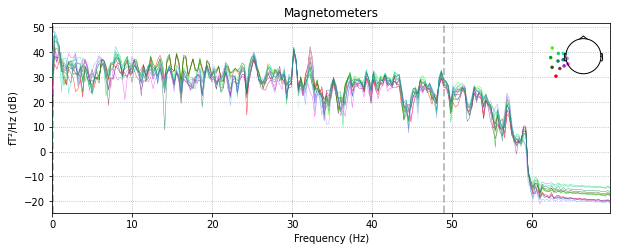

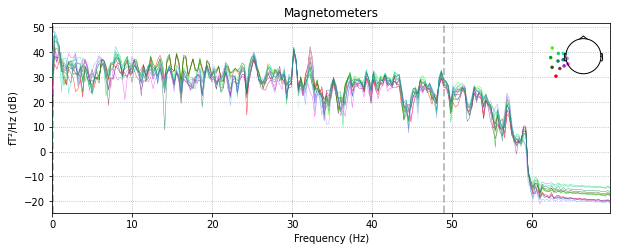

In [66]:
raw.filter(None, 49., fir_design="firwin")
raw.plot_psd(fmax=70, tmax=10., picks=picks, area_mode="range", average=False)

## 2. High-pass filtering to remove slow drifts (DC drift)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 1983 samples (3.302 sec)

Effective window size : 3.410 (s)


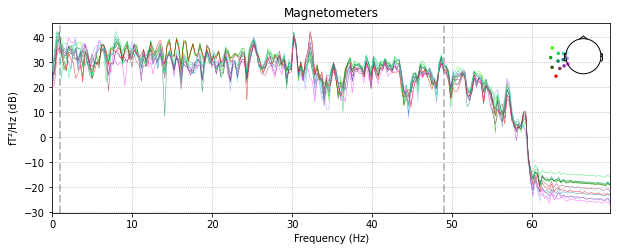

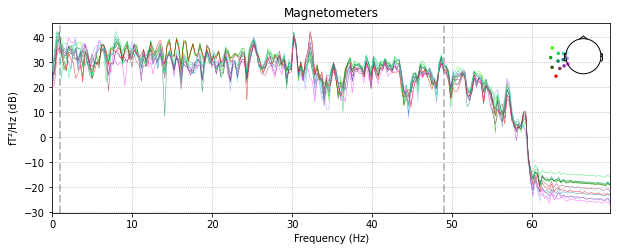

In [67]:
raw.filter(1., None, fir_design="firwin")   #Remove any frequency between 0 to 1
raw.plot_psd(fmax=70, tmax=10., picks=picks, area_mode="range", average=False)

In frequency or power spectral domain we canNOT see the slow drifts. we need to see time-frequency representation

## 3. Downsampling and decimation

In the plot below we can find some ECG artifacte (i.e. MEG 0113 and MEG 0143) even with band-pass filtering

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 49 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 49.00 Hz
- Upper transition bandwidth: 12.25 Hz (-6 dB cutoff frequency: 55.12 Hz)
- Filter length: 1983 samples (3.302 sec)



/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


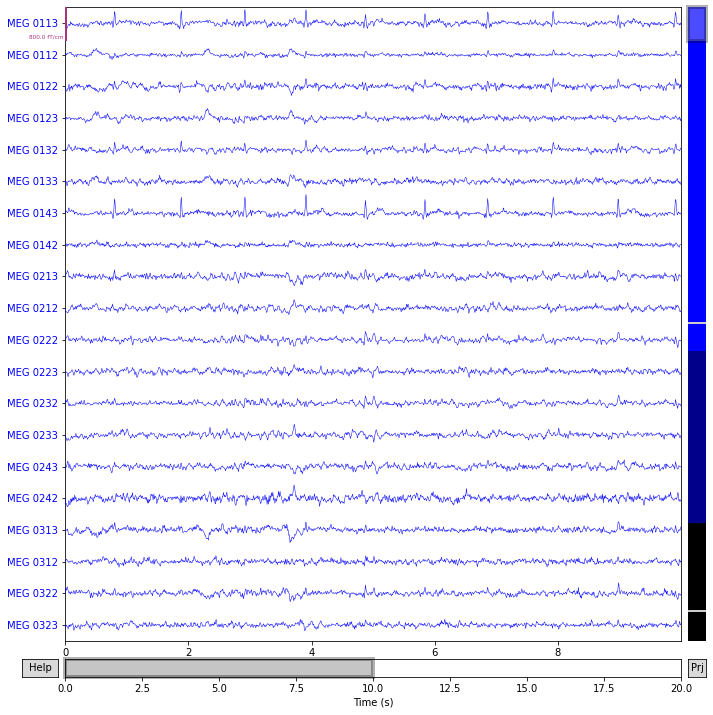

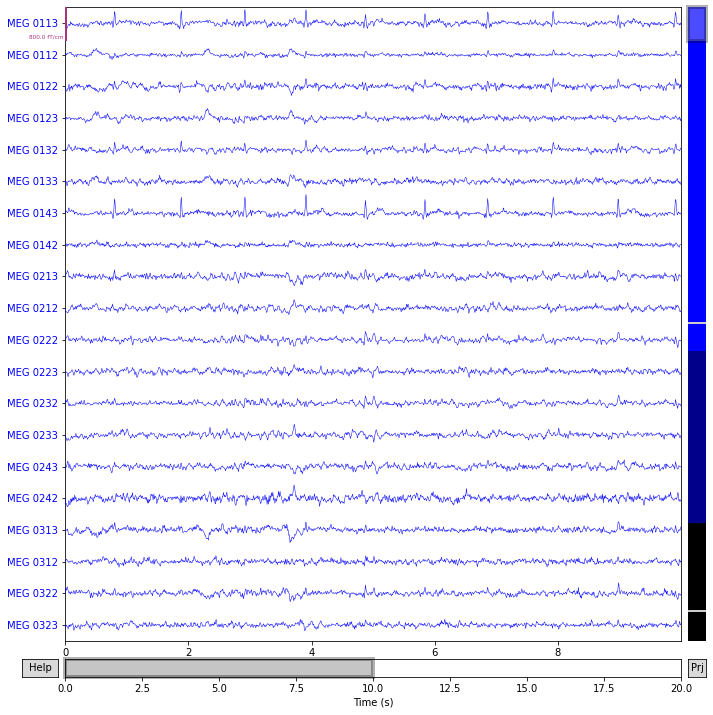

In [68]:
raw.filter(1., 49., fir_design="firwin")
raw.plot()

25 events found
Event IDs: [ 1  2  3  4  5 32]
25 events found
Event IDs: [ 1  2  3  4  5 32]
Effective window size : 10.010 (s)


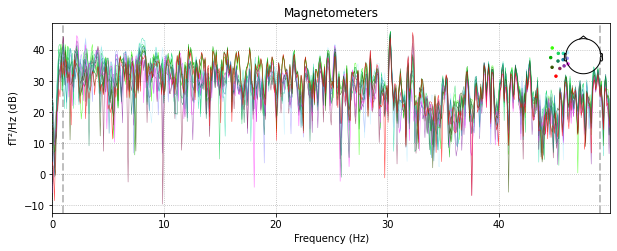

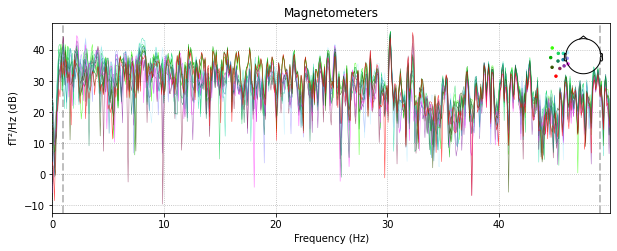

In [69]:
raw.resample(100, npad="auto")  #set sampling frequency to 100 Hz
raw.plot_psd(area_mode="range", tmax=10., picks=picks)

**Warning:** `downsampling` will reduce the timing precision of events

To avoid this reduction in precision, the suggested pipeline for processing final data to be analyzed is:

1. low-pass the data with `mne.io.Raw.filter`.

2. Extract epochs with `mne.Epochs`.

3. Decimate the Epochs object using `mne.Epochs.decimate` or the decim argument to the `mne.Epochs` object.

We also provide the convenience methods `mne.Epochs.resample` and `mne.Evoked`.resample to downsample or upsample data, but these are less optimal because they will introduce edge artifacts into **every epoch**, whereas filtering the raw data will only introduce edge artifacts only at the start and end of the recording.

## Marking bad channels


Befor removing bad epoch we can remove or repear bad channels. 

1. If you already know which are the bad channels, simply do:

In [70]:
raw.info["bad"]=["MEG 2443"]

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:263: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  c = np.array(c)


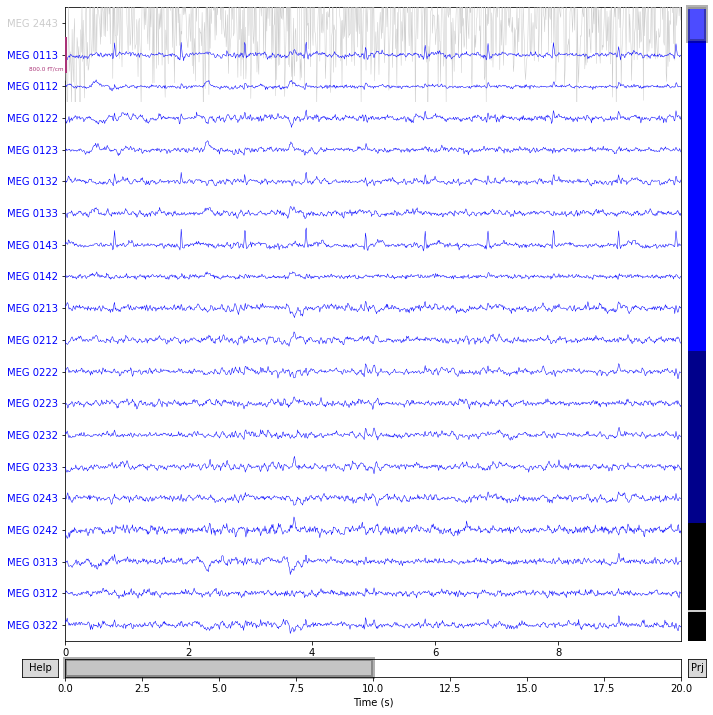

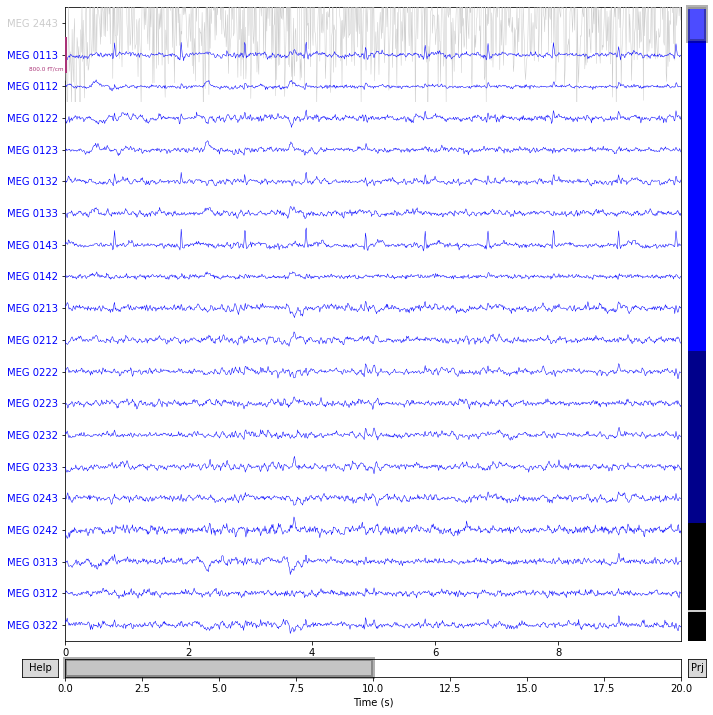

In [79]:
ch_names = raw.info["ch_names"].copy()
ch_names.remove("MEG 2443")
raw.reorder_channels(["MEG 2443"] + ch_names).plot()

2. It's not only `raw`. You can mark bads also in evoked. Let's first read in the evoked data.

Reading /root/mne_data/MNE-sample-data/MEG/sample/sample_audvis-ave.fif ...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102) active
        PCA-v2 (1 x 102) active
        PCA-v3 (1 x 102) active
        Average EEG reference (1 x 60) active
    Found the data of interest:
        t =    -199.80 ...     499.49 ms (Left Auditory)
        0 CTF compensation matrices available
        nave = 55 - aspect type = 100
Projections have already been applied. Setting proj attribute to True.
Applying baseline correction (mode: mean)
Removing projector <Projection | PCA-v1, active : True, n_channels : 102>
Removing projector <Projection | PCA-v2, active : True, n_channels : 102>
Removing projector <Projection | PCA-v3, active : True, n_channels : 102>
Removing projector <Projection | Average EEG reference, active : True, n_channels : 60>


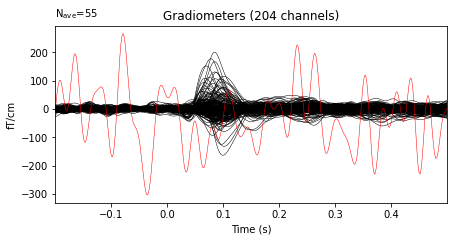

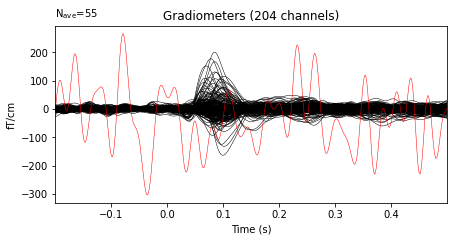

In [82]:
fname = data_path + "/MEG/sample/sample_audvis-ave.fif"

evoked = mne.read_evokeds(fname, condition="Left Auditory",
                       baseline=(None, 0))
evoked.pick_types(meg="grad", eeg=False, exclude=[])

#Plot with bad channel
evoked.plot(exclude=[], time_unit="s")


It's also possible to repair the bad channels using interpolation

In [83]:
evoked.interpolate_bads(reset_bads=False, verbose=True)

Interpolating bad channels
    Automatic origin fit: head of radius 91.0 mm
    Computing dot products for 203 MEG channels...
    Computing cross products for 203 → 1 MEG channel...
    Preparing the mapping matrix...
    Truncating at 84/203 components to omit less than 0.0001 (9.7e-05)


<Evoked | 'Left Auditory' (average, N=55), -0.1998 – 0.49949 sec, baseline -0.199795 – 0 sec, 204 ch, ~3.7 MB>

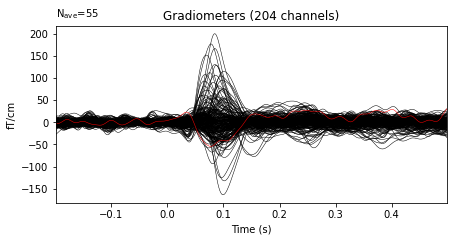

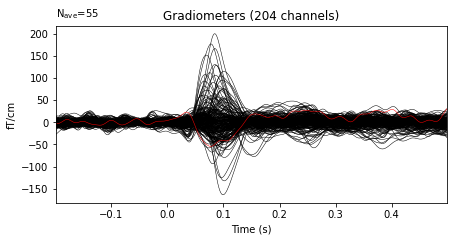

In [84]:
evoked.plot(exclude=[], time_unit="s")

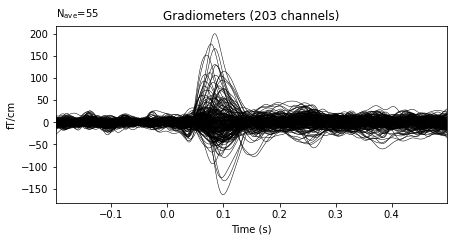

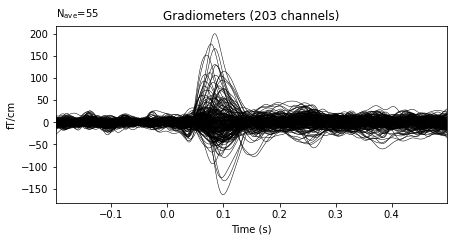

In [85]:
evoked.plot()

## Making bad epoch

We can use mne threshold based detector to identify bad epochs in our data but we need to define some parameters or set of values we can use for detecting thar epochs based on the amplitude values

We know from previous lesson that for epoching we need to make event

In [90]:
events = mne.find_events(raw, stim_channel="STI 014")
event_id = {"auditory/left":1}
tmin, tmax = -0.2, 0.5

baseline = (None, 0)    #means from first instant to t=0
picks = mne.pick_types(raw.info, meg=True, eeg=True, eog=True,
                       stim=False, exclude="bads")
reject = dict(grad=4000e-13, mag=4e-12, eog=200e-6)

epochs = mne.Epochs(raw, events, event_id, tmin, tmax, baseline=baseline, 
                    picks=picks, reject= reject, proj=True, preload=True)

25 events found
Event IDs: [ 1  2  3  4  5 32]
Not setting metadata
Not setting metadata
6 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 3)
3 projection items activated
Loading data for 6 events and 71 original time points ...
0 bad epochs dropped


You can also reject after constructing epochs, just do:

In [92]:
reject.update({"eog": 150e-6})
print(reject)

epochs.drop_bad(reject=reject)

{'grad': 4e-10, 'mag': 4e-12, 'eog': 0.00015}
0 bad epochs dropped


<Epochs |  6 events (all good), -0.2 - 0.5 sec, baseline -0.2 – 0 sec, ~4.5 MB, data loaded,
 'auditory/left': 6>

##Tuning rejection thresholds

In [93]:
import matplotlib.pyplot as plt
from ipywidgets import interact

picks = mne.pick_types(raw.info, meg=False, eeg=True)
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True,
                    picks=picks, baseline=baseline, reject=None,                    
                    preload=True)

def reject_epochs(reject):
    reject = dict(eeg=reject * 1e-6)
    evoked = epochs.copy().drop_bad(reject=reject, verbose=False).average()
    evoked.plot(spatial_colors=True)
    print('Number of epochs retained: %d/%d' % (evoked.nave, len(epochs)))

Not setting metadata
Not setting metadata
6 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
3 projection items activated
Loading data for 6 events and 71 original time points ...
0 bad epochs dropped


interactive(children=(IntSlider(value=135, description='reject', max=250, min=35, step=10), Output()), _dom_cl…

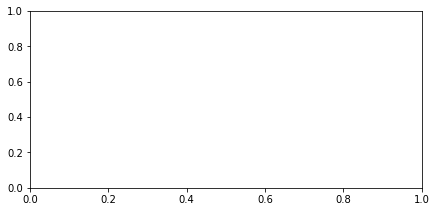

In [94]:
interact(reject_epochs, reject=(35, 250, 10));

# Autorejection

Autoreject (global) can compute the rejection dictionary automatically

In [99]:
! pip install -U autoreject

The easiest way to get started is to copy the following three lines of code in your script:

In [ ]:

# from autoreject import AutoReject

# ar = AutoReject()

# epochs_clean = ar.fit_transform(epochs)  

`get_rejection_threshold` returen the rejection dictionary

In [101]:
from autoreject import get_rejection_threshold  # noqa
reject = get_rejection_threshold(epochs)

print(reject)

Estimating rejection dictionary for eeg
{'eeg': 5.146485776017458e-05}


Autoreject (local) finds per channel thresholds:

In [104]:
import numpy as np
from autoreject import AutoReject

n_interpolates = np.array([1, 2, 4])
consensus = np.linspace(0.5, 1., 6) 

ar = AutoReject(n_interpolates, consensus, thresh_method="random_search",
                 random_state=42)

In [114]:
raw.info["bad"]=[]
picks = mne.pick_types(raw.info, meg="grad", eeg=False)
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, baseline=baseline,
                    picks=picks, preload=True, reject=None, proj=True)



Not setting metadata
Not setting metadata
6 matching events found
Setting baseline interval to [-0.2, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Loading data for 6 events and 71 original time points ...
0 bad epochs dropped


In [116]:


# Note that fitting and transforming can be done on different compatible
# portions of data if needed.
ar.fit(epochs["auditory/left"])

99 coil definitions read
Running autoreject on ch_type=grad


Computing thresholds ...: 100%|██████████| 203/203 [00:21<00:00,  9.46it/s]


Repairing epochs: 100%|██████████| 6/6 [00:00<00:00, 118.14it/s]

n_interp:   0%|          | 0/3 [00:00<?, ?it/s]

Repairing epochs:   0%|          | 0/6 [00:00<?, ?it/s]

Repairing epochs:  17%|█▋        | 1/6 [00:00<00:00,  6.37it/s]

Repairing epochs:  33%|███▎      | 2/6 [00:00<00:00,  6.01it/s]

Repairing epochs:  50%|█████     | 3/6 [00:00<00:00,  5.16it/s]

Repairing epochs:  67%|██████▋   | 4/6 [00:00<00:00,  4.96it/s]

Repairing epochs:  83%|████████▎ | 5/6 [00:00<00:00,  4.79it/s]

Repairing epochs: 100%|██████████| 6/6 [00:01<00:00,  5.16it/s]



n_interp:   0%|          | 0/3 [00:01<?, ?it/s]


ValueError: ignored

In [ ]:
for ch_name in epochs.info['ch_names'][:5]:
     print('%s: %s' % (ch_name, ar.threshes_[ch_name]))

# plt.hist(np.array(list(ar.threshes_.values())), 30, color='g', alpha=0.4)

We can check what applying autoreject would do to the epochs:

* Good data (light red)

* Bad segment but not to be interpolated (medium dark red)

* Bad segment to be interpolated (dark red)

In [ ]:
reject_log = ar.get_reject_log(epochs['auditory/left'])
reject_log.plot()

Another way to visualize this is to plot them on the epochs

In [ ]:
reject_log.plot_epochs(epochs['auditory/left']);

We can apply these rejection thresholds to new (or to the old) data:

In [ ]:
epochs_clean = ar.transform(epochs['auditory/left'])
evoked = epochs['auditory/left'].average()
evoked.info['bads'] = ['MEG 2443']
evoked.plot(exclude=[]);

evoked_clean = epochs_clean.average()
evoked_clean.info['bads'] = ['MEG 2443']
evoked_clean.plot(exclude=[]);